In [1]:
import requests
import xml.etree.ElementTree as ET
import pprint
import matplotlib.pyplot as plt
import numpy as np
import BondGraphTools as bgt
from copy import copy, deepcopy
from ipynb.fs.full.FunctionsOne import  simpleReactionOne
from ipynb.fs.full.FunctionsTwo import catRecognition, simpleReactionTwo

In [2]:
def main(fileName,modelName,*connections):
    
    # Get the category of each sub-system
    category=catRecognition()
    
    if category[0]=='simple reaction (1)':
        [x_0,model,rVal]=simpleReactionOne(fileName,modelName,*connections)
        
        key=model.control_vars.keys()
        control={}  
        for k,i in zip(key,rVal):
            control[k]=i
            
                
    if category[0]=='simple reaction (2)':
        [x_0,model,rVal]=simpleReactionTwo(fileName,modelName,*connections)
         
        # Put all the control variables (model.control_vars) with their values (r_value) in one dictionary
        key=model.control_vars.keys()
        controlVals=rVal.values()
        control={}
        i=0
        for k, m in zip(key,controlVals):
            control[k]=float(m[0])
            

    
    return [x_0,model,control]

In [ ]:
# Running the main function for an example of the reactions from type 'simple reaction (1)'
[x0,M,c]=main('Reactions.cellml','Reaction_Connection','reaction_1','out','reaction_2','in','reaction_2','out','reaction_3','in','reaction_3','out','reaction_4','in')

In [3]:
# Running the main function for an example of the reactions from type 'simple reaction (2)'
[x0,M,c]=main('Reactions.cellml','Reaction_Connection','reaction_1','out','reaction_2','in','reaction_2','out','reaction_3','in')

Please select the category of each sub-system according to the following list:


diffusion: A <----> A*
simple reaction (1): A <---> B
simple reaction (2): A+B+... <---> C+D+...
enzyme catalyzed reaction (1): A+E <---> E+B
enzyme catalyzed reaction (2): A+E <---> B <---> E+C


Enter the category of the reactions : simple reaction (2)


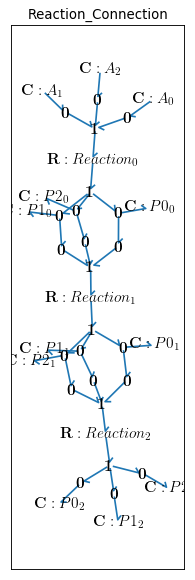

In [4]:
bgt.draw(M)

In [5]:
# Simulation with the preferred time span for reactions from type 'simple reaction (2)'
t_span = [0,30]
t, x = bgt.simulate(M, x0=x0, timespan=t_span, control_vars=c)

In [ ]:
# Simulation with the preferred time span for reactions from type 'simple reaction (1)'
t_span = [0,12]
t, x = bgt.simulate(M, x0=x0, timespan=t_span, control_vars=c)

In [ ]:
# Running the main function for an example of the reactions from type 'simple reaction (1)'
for q, c, label in [(x[:,0],'r', 'q_B_0'), (x[:,1],'c', 'q_B_1'), (x[:,2],'y', 'q_B_2'), (x[:,3],'m', 'q_B_3'), (x[:,4],'g', 'q_A_0')]:
    fig=plt.plot(t,q,c, label=label)
    plt.xlabel("time (s)")
    plt.ylabel("molar concentration (mol.m-3)") 
    plt.legend(loc='upper right')
plt.grid()
title=plt.title('Molar Concentration amount of the input substance/products of all the reactions')

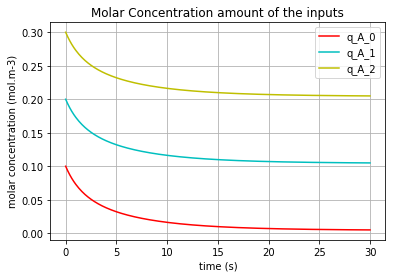

In [6]:
## Running the main function for an example of the reactions from type 'simple reaction (2)'
import matplotlib.pyplot as plt
for q, c, label in [(x[:,9],'r', 'q_A_0'), (x[:,10],'c', 'q_A_1'), (x[:,11],'y', 'q_A_2')]:
    fig=plt.plot(t,q,c, label=label)
    plt.xlabel("time (s)")
    plt.ylabel("molar concentration (mol.m-3)") 
    plt.legend(loc='upper right')
plt.grid()
title=plt.title('Molar Concentration amount of the inputs')

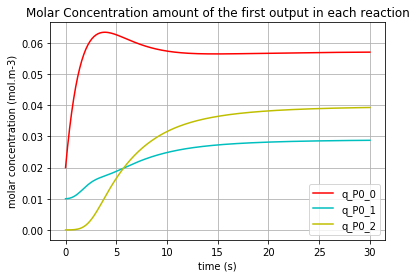

In [7]:
# Running the main function for an example of the reactions from type 'simple reaction (2)'
for q, c, label in [(x[:,0],'r', 'q_P0_0'), (x[:,3],'c', 'q_P0_1'), (x[:,6],'y', 'q_P0_2')]:
    fig=plt.plot(t,q,c, label=label)
    plt.xlabel("time (s)")
    plt.ylabel("molar concentration (mol.m-3)") 
    plt.legend(loc='lower right')
plt.grid()
title=plt.title('Molar Concentration amount of the first output in each reaction')

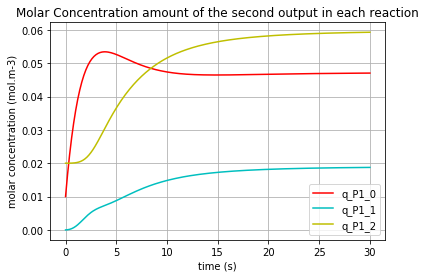

In [8]:
# Running the main function for an example of the reactions from type 'simple reaction (2)'
for q, c, label in [(x[:,1],'r', 'q_P1_0'), (x[:,4],'c', 'q_P1_1'), (x[:,7],'y', 'q_P1_2')]:
    fig=plt.plot(t,q,c, label=label)
    plt.xlabel("time (s)")
    plt.ylabel("molar concentration (mol.m-3)") 
    plt.legend(loc='lower right')
plt.grid()
title=plt.title('Molar Concentration amount of the second output in each reaction')

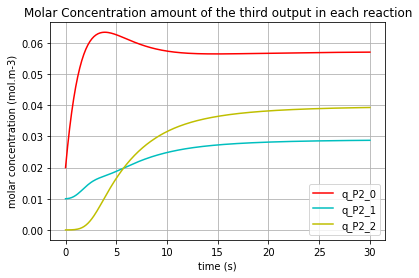

In [9]:
# Running the main function for an example of the reactions from type 'simple reaction (2)'
for q, c, label in [(x[:,2],'r', 'q_P2_0'), (x[:,5],'c', 'q_P2_1'), (x[:,8],'y', 'q_P2_2')]:
    fig=plt.plot(t,q,c, label=label)
    plt.xlabel("time (s)")
    plt.ylabel("molar concentration (mol.m-3)") 
    plt.legend(loc='lower right')
plt.grid()
title=plt.title('Molar Concentration amount of the third output in each reaction')